In [ ]:
#Install spacy & scispacy Packages
#provides a set of scientific and biomedical NLP tools based on spacy
!pip install -U spacy
!pip install scispacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-3.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scispacy 0.5.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.1 which is incompatible.
mordecai 2.1.0 requires spacy<3.0,>=2.3, but you have spacy 3.5.1 which is incompatible.
en-ner-bionlp13cg-md 0.4.0 requires spacy<3.1.0,>=3.0.1, but you have spacy 3.5.1 which is incompatible.
en-core-sci-sm 0.5.1 requires spacy<3.5.0,>=3.4.1, but you have spacy 3.5.1 which is incompatible.
en-core-sci-md 0.5.1 requires spacy<3.5.0,>=3.4.1, but you have spacy 3.5.1 which is incompatible.


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz
#This is a pre-trained model that provides NER (named entity recognition)
## and other NLP capabilities for scientific and biomedical text.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz (15.9 MB)
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_md-0.5.1.tar.gz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_md-0.5.1.tar.gz (120.2 MB)
  Preparing metadata (setup.py) ... done


In [ ]:
#Install other Packages

!pip install render


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scispacy
import spacy
#Core models
import en_core_sci_sm
import en_core_sci_md
#NER specific models
import spacy
nlp=spacy.load('en_core_web_sm')

nlp.pipe_names
#Tools for extracting & displaying data
from spacy import displacy
import pandas as pd
#en_core_web_sm is a small, general-purpose English model that
# provides basic NLP capabilities such as tokenization, part-of-speech tagging, and named entity recognition (NER). 
#en_core_sci_sm, on the other hand, is a larger, domain-specific 
#model that has been trained on scientific and biomedical text.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/mtsamples.csv')

In [ ]:
text = df.loc[10, "transcription"]
#df.loc to extract a specific value from a pandas dataframe df.
# In this case, we are extracting the value in the row with index 10 and column with name "transcription".



In [ ]:
nlp_sm = en_core_sci_sm.load()
doc = nlp_sm(text)
#Display resulting
displacy_image = displacy.render(doc, jupyter=True,style='ent')

In [ ]:
nlp_md = en_core_sci_md.load()
doc = nlp_md(text)
#Display resulting entity extraction
displacy_image = displacy.render(doc, jupyter=True,style='ent')

In [ ]:
print("TEXT", "START", "END", "ENTITY TYPE")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

TEXT START END ENTITY TYPE
DIAGNOSIS 13 22 ENTITY
Morbid obesity 26 40 ENTITY
POSTOPERATIVE DIAGNOSIS 43 66 ENTITY
Morbid obesity 70 84 ENTITY
antecolic 139 148 ENTITY
antegastric 150 161 ENTITY
EEA 173 176 ENTITY
anastamosis 177 188 ENTITY
esophagogastroduodenoscopy 190 216 ENTITY
General with 233 245 ENTITY
endotracheal intubation 246 269 ENTITY
PROCEDURE 288 297 ENTITY
male 323 327 ENTITY
overweight 341 351 ENTITY
years 361 366 ENTITY
weight loss diets 400 417 ENTITY
programs 422 430 ENTITY
patient 437 444 ENTITY
comorbidities 467 480 ENTITY
obesity 496 503 ENTITY
patient 510 517 ENTITY
attended 522 530 ENTITY
bariatric seminar 535 552 ENTITY
dietician 570 579 ENTITY
psychologist 584 596 ENTITY
patient 603 610 ENTITY
read 615 619 ENTITY
comprehensive 632 645 ENTITY
handout 646 653 ENTITY
risks 674 679 ENTITY
benefits 684 692 ENTITY
bypass surgery 696 710 ENTITY
signing 731 738 ENTITY
consent 746 753 ENTITY
DETAIL 773 779 ENTITY
risks 787 792 ENTITY
benefits 797 805 ENTITY
patient 82

In [ ]:
df.dropna(subset=['transcription'], inplace=True)
df_subset = df.sample(n=100, replace=False, random_state=42)
df_subset.info()
df_subset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 3162 to 3581
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   description        100 non-null    object
 2   medical_specialty  100 non-null    object
 3   sample_name        100 non-null    object
 4   transcription      100 non-null    object
 5   keywords           78 non-null     object
dtypes: int64(1), object(5)
memory usage: 5.5+ KB


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
3162,3162,Markedly elevated PT INR despite stopping Cou...,Hematology - Oncology,Hematology Consult - 1,"HISTORY OF PRESENT ILLNESS:, The patient is w...",NaN
1981,1981,Intercostal block from fourth to tenth interc...,Pain Management,Intercostal block - 1,"PREPROCEDURE DIAGNOSIS:, Chest pain secondary...","pain management, xylocaine, marcaine, intercos..."
1361,1361,The patient is a 65-year-old female who under...,SOAP / Chart / Progress Notes,Lobectomy - Followup,"HISTORY OF PRESENT ILLNESS: , The patient is a...","soap / chart / progress notes, non-small cell ..."
3008,3008,Construction of right upper arm hemodialysis ...,Nephrology,Hemodialysis Fistula Construction,"PREOPERATIVE DIAGNOSIS: , End-stage renal dise...","nephrology, end-stage renal disease, av dialys..."
4943,4943,Bronchoscopy with brush biopsies. Persistent...,Cardiovascular / Pulmonary,Bronchoscopy - 8,"PREOPERATIVE DIAGNOSIS: , Persistent pneumonia...","cardiovascular / pulmonary, persistent pneumon..."


In [ ]:
import spacy
import spacy
nlp=spacy.load('en_core_web_sm')

# then load mordecai
!pip install mordecai



/usr/local/lib/python3.9/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-2.3.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
  Using cached thinc-7.4.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached srsly-1.0.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (209 kB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.6
    Uninstalling srsly-2.4.6:
      Successfully uninstalled srsly-2.4.6
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.9
    Uninstalling thinc-8.1.9:
      Successfully uninstalled thinc-8.1.9
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
df.columns
df=df[['transcription','medical_specialty']]
df.head()


,transcription,medical_specialty
0,"SUBJECTIVE:, This 23-year-old white female pr...",Allergy / Immunology
1,"PAST MEDICAL HISTORY:, He has difficulty climb...",Bariatrics
2,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",Bariatrics
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary


In [ ]:
df['medical_specialty'].value_counts()


 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

In [ ]:
counts = df['medical_specialty'].value_counts()

df = df[~df['medical_specialty'].isin(counts[counts < 50].index)]

In [ ]:
df['medical_specialty'].value_counts()


 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
Name: medical_specialty, dtype: int64

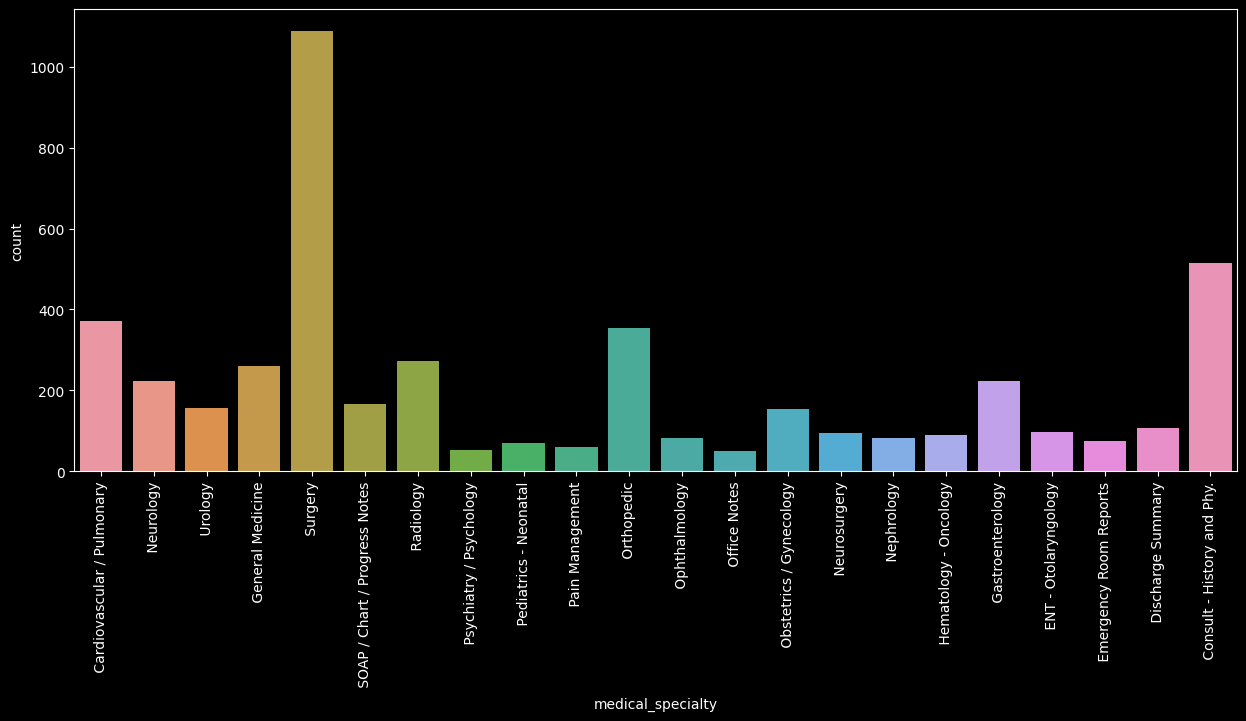

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use(['dark_background'])
plt.xticks(rotation=90)
sns.countplot(x='medical_specialty', data = df )
plt.show()

In [ ]:
df.isna().sum()

transcription        0
medical_specialty    0
dtype: int64

In [ ]:
df.shape


(4647, 2)

In [ ]:
df.dropna(axis=0,inplace=True)


In [ ]:
df.shape

(4647, 2)

In [ ]:
print('Sample transcription 1:'+df.iloc[4]['transcription']+'\n')
print('Sample transcription 2:'+df.iloc[14]['transcription']+'\n')

Sample transcription 1:2-D STUDY,1. Mild aortic stenosis, widely calcified, minimally restricted.,2. Mild left ventricular hypertrophy but normal systolic function.,3. Moderate biatrial enlargement.,4. Normal right ventricle.,5. Normal appearance of the tricuspid and mitral valves.,6. Normal left ventricle and left ventricular systolic function.,DOPPLER,1. There is 1 to 2+ aortic regurgitation easily seen, but no aortic stenosis.,2. Mild tricuspid regurgitation with only mild increase in right heart pressures, 30-35 mmHg maximum.,SUMMARY,1. Normal left ventricle.,2. Moderate biatrial enlargement.,3. Mild tricuspid regurgitation, but only mild increase in right heart pressures.

Sample transcription 2:PROCEDURES:, Cystourethroscopy and transurethral resection of prostate.,COMPLICATIONS:, None.,ADMITTING DIAGNOSIS:, Difficulty voiding.,HISTORY:, This 67-year old Hispanic male patient was admitted because of enlarged prostate and symptoms of bladder neck obstruction.  Physical examination

In [ ]:
import string
import re
from imblearn.over_sampling import SMOTE
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

In [ ]:
counts = df['medical_specialty'].value_counts()

df = df[~df['medical_specialty'].isin(counts[counts < 50].index)]

In [ ]:
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ',text)
    text = extra_symbol_remover.sub('',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))    
    return ' '.join(wordlist) 

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['transcription'] = df['transcription'].apply(clean_text)
df['transcription'] = df['transcription'].apply(lemmatize_text)


In [ ]:
print('Sample Transcription 1:'+df.iloc[5]['transcription']+'\n')
print('Sample Transcription 2:'+df.iloc[125]['transcription']+'\n')

Sample Transcription 1:cc confusion slurred speech hx primarily obtained boyfriend 31 rhf experienced flulike illness 68 week prior presentation 34 week prior presentation found passed bed awoken appeared confused lethargic apparently recovered within 24 hour two week prior presentation demonstrated emotional lability uncharacteristic outburst anger inappropriate laughter left stove began slurring speech 2 day prior admission day presentation developed right facial weakness began stumbling right denied associated headache nausea vomiting fever chill neck stiffness visual change history illicit drug etoh use head trauma pmh migraine headache fhx unremarkable shx divorced life boyfriend 3 child alive well denied tobacco illicit drug use rarely consumes etoh ro irregular menses exam bp118 66 hr83 rr 20 t368c alert oriented name perseverative thought process utilized one two word answer phrase nonfluent rarely followed command impaired writing name cn flattened right nasolabial fold motor 

In [ ]:
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = df['medical_specialty'].tolist()
category_list = df.medical_specialty.unique()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)   


ValueError: ignored

In [ ]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

In [ ]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels= category_list)

In [ ]:
print(classification_report(y_test,y_pred,labels=category_list))

In [ ]:
df['medical_specialty'].value_counts()

In [ ]:
df = df[df['medical_specialty'] != ' Surgery']
df = df[df['medical_specialty'] != ' SOAP / Chart / Progress Notes']
df = df[df['medical_specialty'] != ' Emergency Room Reports']
df = df[df['medical_specialty'] != ' Discharge Summary']
df = df[df['medical_specialty'] != ' Office Notes']
df = df[df['medical_specialty'] != ' General Medicine']
df = df[df['medical_specialty'] != ' Pain Management']

In [ ]:
df['medical_specialty'].unique()

In [ ]:
df.loc[df.medical_specialty == ' Neurosurgery', "medical_specialty"] = ' Neurology'
df.loc[df.medical_specialty == ' Nephrology', "medical_specialty"] = " Urology"

In [ ]:
df['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Neurology                         317
 Radiology                         273
 General Medicine                  259
 Urology                           237
 Gastroenterology                  224
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Hematology - Oncology              90
 Ophthalmology                      83
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
Name: medical_specialty, dtype: int64

In [ ]:
import spacy
import en_ner_bionlp13cg_md

In [ ]:
nlp = en_ner_bionlp13cg_md.load()

/usr/local/lib/python3.9/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_ner_bionlp13cg_md' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz (125.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.0.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.9 MB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached srsly-2.4.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (491 kB)
  Using cached thinc-8.0.17-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (668 kB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.2
    Uninstalling catalogue-1.0.2:
      Successfully uninstalled catalogue-1.0.2
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.6
    Uninstalling srsly-1.0.6:
      Successfully uninstalled srsly-1.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.6
    Uninst

In [ ]:
! pip install en_ner_bionlp13cg_md


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def process_Text( text):
    wordlist=[]
    doc = nlp(text)
    for ent in doc.ents:
        wordlist.append(ent.text)
    return ' '.join(wordlist)  

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def clean_text(text ): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    intial_sentences= sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]
    
    for sentence in intial_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))       
    return ' '.join(wordlist) 

In [ ]:
print('Sample Transcription 1:'+df.iloc[5]['transcription']+'\n')
print('Sample Transcription 2:'+df.iloc[125]['transcription']+'\n')
print('Sample Transcription 3:'+df.iloc[1000]['transcription'])


Sample Transcription 1:cc confusion slurred speech hx primarily obtained boyfriend 31 rhf experienced flulike illness 68 week prior presentation 34 week prior presentation found passed bed awoken appeared confused lethargic apparently recovered within 24 hour two week prior presentation demonstrated emotional lability uncharacteristic outburst anger inappropriate laughter left stove began slurring speech 2 day prior admission day presentation developed right facial weakness began stumbling right denied associated headache nausea vomiting fever chill neck stiffness visual change history illicit drug etoh use head trauma pmh migraine headache fhx unremarkable shx divorced life boyfriend 3 child alive well denied tobacco illicit drug use rarely consumes etoh ro irregular menses exam bp118 66 hr83 rr 20 t368c alert oriented name perseverative thought process utilized one two word answer phrase nonfluent rarely followed command impaired writing name cn flattened right nasolabial fold motor 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

from imblearn.over_sampling import SMOTE

In [ ]:
def get_sentence_word_count(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for text in text_list:
        sentences=sent_tokenize(str(text).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if(word in vocab.keys()):
                    vocab[word] = vocab[word] +1
                else:
                    vocab[word] =1 
    word_count = len(vocab.keys())
    return sent_count,word_count
    

In [ ]:
df = df[df['transcription'].notna()]
sent_count,word_count= get_sentence_word_count(df['transcription'].tolist())
print("Number of sentences in transcriptions column: "+ str(sent_count))
print("Number of unique words in transcriptions column: "+str(word_count))



data_categories  = df.groupby(df['medical_specialty'])
i = 1
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

Number of sentences in transcriptions column: 2840
Number of unique words in transcriptions column: 21722
Cat:1  Cardiovascular / Pulmonary : 371
Cat:2  Consult - History and Phy. : 516
Cat:3  ENT - Otolaryngology : 96
Cat:4  Gastroenterology : 224
Cat:5  Hematology - Oncology : 90
Cat:6  Neurology : 317
Cat:7  Obstetrics / Gynecology : 155
Cat:8  Ophthalmology : 83
Cat:9  Orthopedic : 355
Cat:10  Pediatrics - Neonatal : 70
Cat:11  Psychiatry / Psychology : 53
Cat:12  Radiology : 273
Cat:13  Urology : 237


In [ ]:
filtered_data_categories = data_categories.filter(lambda x:x.shape[0] > 50)
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
i=1
for catName,dataCategory in final_data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1



Cat:1  Cardiovascular / Pulmonary : 371
Cat:2  Consult - History and Phy. : 516
Cat:3  ENT - Otolaryngology : 96
Cat:4  Gastroenterology : 224
Cat:5  Hematology - Oncology : 90
Cat:6  Neurology : 317
Cat:7  Obstetrics / Gynecology : 155
Cat:8  Ophthalmology : 83
Cat:9  Orthopedic : 355
Cat:10  Pediatrics - Neonatal : 70
Cat:11  Psychiatry / Psychology : 53
Cat:12  Radiology : 273
Cat:13  Urology : 237


In [ ]:
df['transcription'] = df['transcription'].apply(lemmatize_text)
df['transcription'] = df['transcription'].apply(clean_text)

In [ ]:
df['medical_specialty'].nunique()


13